<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Top_ten_momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import the Python modules and packages required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
url  = ['https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/IBXLDia_13-09-23.csv' #ibra50
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/IBXXDia_13-09-23.csv' #ibra100
  ,'https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/IBOVDia_13-09-23.csv' #ibov
]

escolha = int(input('0-ibra50; 1-ibra100; 2-ibov: '))

0-ibra50; 1-ibra100; 2-ibov2


In [3]:
df = pd.read_csv(url[escolha] ,sep=';' , decimal=',' , thousands='.' , header=1 , skiprows=0 , skipfooter=2 , encoding='latin-1',index_col=False , engine='python')
# view the first 5 lines
df

,Código,Ação,Tipo,Qtde. Teórica,Part. (%)
0,RRRP3,3R PETROLEUM,ON NM,235661666,0.375
1,ALSO3,ALIANSCSONAE,ON NM,532616595,0.613
2,ALPA4,ALPARGATAS,PN N1,208965950,0.087
3,ABEV3,AMBEV S/A,ON,4394245879,2.916
4,ARZZ3,AREZZO CO,ON NM,62305891,0.212
...,...,...,...,...,...
81,VAMO3,VAMOS,ON NM,421383330,0.227
82,VIIA3,VIA,ON NM,1582929157,0.089
83,VBBR3,VIBRA,ON NM,1114412532,1.021
84,WEGE3,WEG,ON NM,1481593024,2.556


In [4]:
# import yfinance or install it first
try:
    import yfinance as yf
except:
    !pip install yfinance
    import yfinance as yf

In [5]:
%timeit
# use yfinance to collect the data
data = yf.download((df['Código']+'.SA').to_list(),
                         period="3mo",
                         interval="1d",
                         auto_adjust=True,
                         back_adjust=True,
                         prepost=True)

[*********************100%%**********************]  86 of 86 completed


In [ ]:
# select from the multiindex to eyeball data
# data.xs('WEGE3.SA', axis=1, level=1).head()

In [7]:
data_close = data['Close']
data_returns = data_close.pct_change(1)
data_returns.head()

,ABEV3.SA,ALPA4.SA,ALSO3.SA,ARZZ3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,...,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VAMO3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-06-14,0.003929,0.051823,0.020247,0.009660,0.037879,0.086601,0.041752,0.004936,0.002772,0.006571,...,-0.001670,0.010101,0.015089,0.017544,0.028671,0.013652,0.047244,0.034716,0.013922,0.098592
2023-06-15,-0.009132,0.031022,0.003020,-0.001704,0.029197,0.005012,-0.033509,0.020467,0.004838,0.002967,...,0.015050,-0.005000,0.000000,0.007824,-0.004079,-0.015713,0.000000,-0.007206,-0.000792,0.055741
2023-06-16,-0.007900,-0.013274,0.006452,-0.015360,-0.041844,0.027930,-0.006118,-0.007421,0.000000,0.002959,...,-0.015486,-0.015075,-0.001351,0.001581,-0.070990,0.003991,-0.041353,-0.024722,0.000264,-0.017423
2023-06-19,0.002654,-0.020628,0.005128,0.001467,-0.019245,0.039301,0.012312,0.018590,0.020633,0.017699,...,0.003681,0.015306,0.014885,-0.003875,-0.016899,0.013061,0.007843,0.005581,-0.004756,0.020956


## Data Wrangling
Vamos se livrar de quaisquer ações que esticaram muito em um único dia e perdemos o barco, o próximo passo é eliminar todas as linhas que cresceram mais de 50% em um dia.

In [18]:
data_returns.shape

(66, 86)

In [16]:
# set the growth theshold
daily_growth_threshold = 0.5
# keep only the columns without a daily growth that big
data_returns = data_returns.loc[:, ~(data_returns >=daily_growth_threshold).any()]

In [19]:
data_returns.shape

(66, 86)

In [20]:
# calculate the cumulative daily growth
data_cum_returns = (1 + data_returns).cumprod() -1

## The  Top Ten  


In [25]:
# take the last row, transpose, x100
latest = data_cum_returns.tail(1).T.mul(100)
latest.columns = ['% change']
topten = round(latest.sort_values(by='% change', ascending=False)[:10], 2)
topten

,% change
PRIO3.SA,40.36
YDUQ3.SA,30.75
EZTC3.SA,22.57
CYRE3.SA,19.94
PETR4.SA,18.81
IRBR3.SA,17.27
RECV3.SA,16.71
PETR3.SA,16.55
BPAC11.SA,15.63
CPFE3.SA,15.46


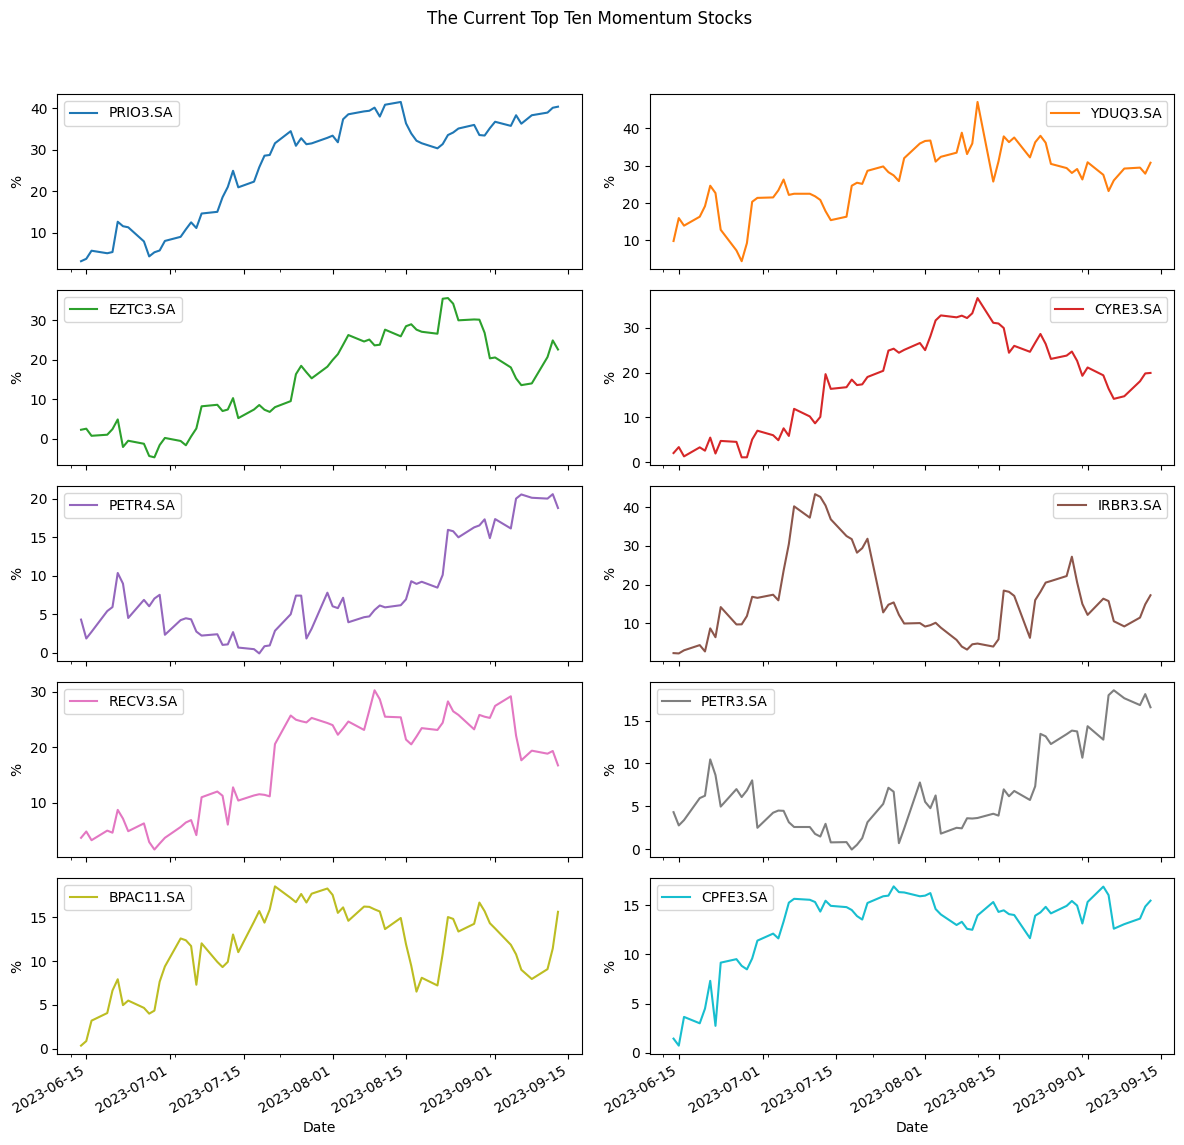

In [26]:
# plot the current top ten
data_cum_returns[list(topten.index)].mul(100).plot(subplots=True,
                                          layout=(5, 2),
                                          figsize=(12,12),
                                          sharex=True,
                                          ylabel='%',
                                          title='The Current Top Ten Momentum Stocks')
# tweek the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## Infos


In [27]:
# get further information
topten_info = {}
for i in topten.index:
    topten_info[i] = yf.Ticker(i).info
# add the information to a data frame
info_df = pd.DataFrame.from_dict(topten_info,orient='index')
# add the growth data
info_df['Growth'] = topten
# rank the companies by growth rate
info_df.sort_values(by=['Growth'], ascending=False, inplace=True)
info_df.head()

,address1,address2,city,state,zip,country,phone,website,industry,industryDisp,...,financialCurrency,trailingPegRatio,fullTimeEmployees,dividendRate,dividendYield,exDividendDate,lastDividendValue,lastDividendDate,fiveYearAvgDividendYield,Growth
PRIO3.SA,"Praia de Botafogo, 370",13º andar - Botafogo,Rio de Janeiro,RJ,22250-040,Brazil,55 21 3721 3800,https://www.prio3.com.br,Oil & Gas E&P,Oil & Gas E&P,...,BRL,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.36
YDUQ3.SA,"Avenida Venezuela,43",NaN,Rio De Janeiro,RJ,NaN,Brazil,NaN,https://yduqs.com.br,Education & Training Services,Education & Training Services,...,BRL,None,17882.0,0.27,0.0132,1.692576e+09,0.274930,1.692576e+09,NaN,30.75
EZTC3.SA,"Avenida República do Líbano, 1921",Ibirapuera,São Paulo,SP,04501-002,Brazil,55 11 5056 8308,https://www.eztec.com.br,Real Estate—Development,Real Estate—Development,...,BRL,None,NaN,0.33,0.0148,1.692317e+09,0.082025,1.692317e+09,2.48,22.57
CYRE3.SA,Rua do Rocio,"nº 109, 2º andar Sala 01 - Parte, Vila Olímpia",São Paulo,SP,04552-000,Brazil,55 11 4502 3333,https://www.cyrela.com.br,Residential Construction,Residential Construction,...,BRL,None,NaN,0.51,0.0230,1.683072e+09,0.511295,1.683072e+09,5.75,19.94
PETR4.SA,"Avenida RepUblica do Chile, 65",Centro,Rio De Janeiro,RJ,20031-912,Brazil,55 21 96940 2116,https://petrobras.com.br,Oil & Gas Integrated,Oil & Gas Integrated,...,BRL,None,45149.0,7.54,0.2259,1.692662e+09,1.149304,1.692662e+09,15.50,18.81


#### Setores das top ten

In [32]:
info_df['sector'].value_counts()

Energy                4
Financial Services    2
Consumer Defensive    1
Real Estate           1
Consumer Cyclical     1
Utilities             1
Name: sector, dtype: int64